#Quiz
> 다음 사이트에서 데이터를 다운 받아 최적의 핸드폰 가격 예측 모델을 만드시오
* https://www.kaggle.com/iabhishekofficial/mobile-price-classification
* 가격은 price_range feature로 판단한다.

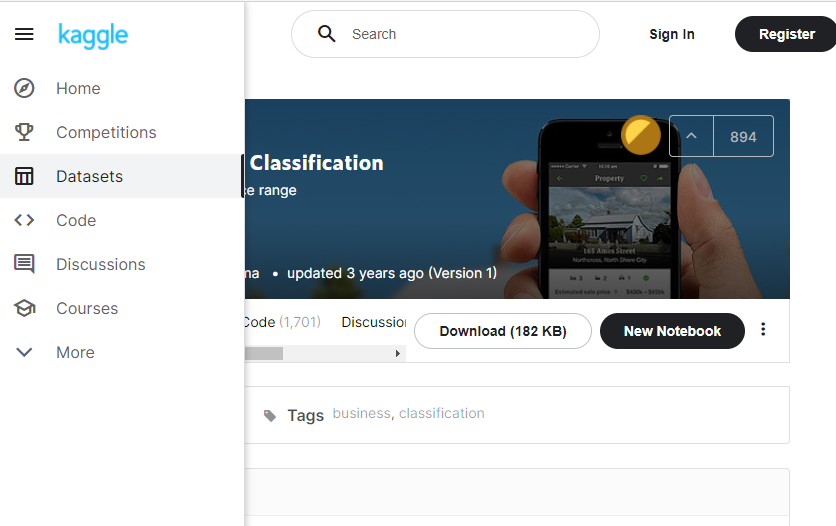

# 풀이

#1. 파일 읽기

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import pandas as pd
path = '/content/drive/MyDrive/4. 머신러닝/4. 분류/3. SVM/data/'
train_file = path+'train.csv'
test_file = path+'test.csv'

df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

In [5]:
df_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [9]:
df_data = df_train.drop('price_range', axis=1)
df_labels = df_train['price_range']

#2. 선형 모델

##2.1 모델 생성

In [10]:
import sklearn.svm as svm

svm_clf = svm.SVC(kernel = 'linear')

##2.2 데이터 분할

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, random_state=62)

##2.3 학습 및 정확도

In [12]:
svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.9616666666666667

#3. Scaling

##3.1 표준화

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_data)
standard_scaled = scaler.transform(df_data)
standard_scaled[:2]

array([[-0.90259726, -0.9900495 ,  0.83077942, -1.01918398, -0.76249466,
        -1.04396559, -1.38064353,  0.34073951,  1.34924881, -1.10197128,
        -1.3057501 , -1.40894856, -1.14678403,  0.39170341, -0.78498329,
         0.2831028 ,  1.46249332, -1.78686097, -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 ,  0.98117712, -0.99289039,
         0.95788598,  1.15502422,  0.68754816, -0.12005944, -0.66476784,
        -0.64598879,  0.58577791,  1.70446468,  0.46731702,  1.11426556,
        -0.63531667, -0.73426721,  0.55964063,  0.99401789, -1.01409939]])

In [14]:
import sklearn.svm as svm
from sklearn.model_selection import train_test_split

svm_clf = svm.SVC(kernel = 'linear')
X_train, X_test, y_train, y_test = train_test_split(standard_scaled, df_labels, test_size=0.3, random_state=62)

svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.9533333333333334

##3.2 정규화

In [15]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_data)
minmax_scaled = scaler.transform(df_data)
minmax_scaled[:2]

array([[0.22778891, 0.        , 0.68      , 0.        , 0.05263158,
        0.        , 0.08064516, 0.55555556, 0.9       , 0.14285714,
        0.1       , 0.01020408, 0.17089453, 0.61277392, 0.28571429,
        0.38888889, 0.94444444, 0.        , 0.        , 1.        ],
       [0.34736139, 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.82258065, 0.66666667, 0.46666667, 0.28571429,
        0.3       , 0.46173469, 0.99332443, 0.63468733, 0.85714286,
        0.16666667, 0.27777778, 1.        , 1.        , 0.        ]])

In [16]:
import sklearn.svm as svm
from sklearn.model_selection import train_test_split

svm_clf = svm.SVC(kernel = 'linear')
X_train, X_test, y_train, y_test = train_test_split(minmax_scaled, df_labels, test_size=0.3, random_state=62)

svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.93

> 실행 결과 원본 데이터가 조금 더 성능이 좋게 나타나며 scaling을 한다면 표준화하는 것이 좋을 듯 하다.

#4. 교차검증

##4.1 cross_val_score

In [17]:
from sklearn.model_selection import cross_val_score, cross_validate

svm_clf = svm.SVC(kernel='linear')

scores = cross_val_score(svm_clf, df_data, df_labels, cv=5)


In [18]:
print(scores)
print(scores.mean())

[0.9775 0.9675 0.9675 0.9725 0.98  ]
0.9730000000000001


In [19]:
df_cross = pd.DataFrame(cross_validate(svm_clf, df_data, df_labels, cv=5))
print(df_cross)

    fit_time  score_time  test_score
0  19.277739    0.003558      0.9775
1   9.995646    0.003508      0.9675
2  14.827756    0.003395      0.9675
3  13.202838    0.003715      0.9725
4  18.218863    0.003542      0.9800


##4.2 하이퍼 파라미터

In [24]:
from sklearn.model_selection import GridSearchCV
clf = svm.SVC(kernel = 'linear')

def get_best_hyper_paramerter(cost_list):
  params =  {
    'C' : cost_list
  }

  grid_cv = GridSearchCV(clf, param_grid=params, scoring='accuracy', cv=5)
  grid_cv.fit(standard_scaled, df_label)
  print('Best Score: ', grid_cv.best_score_)
  print('Best Hyper Parameter: ', grid_cv.best_params_)

In [25]:
cost_list =  [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]

get_best_hyper_paramerter(cost_list)

Best Score:  0.974
Best Hyper Parameter:  {'C': 25}


In [26]:
cost_list =  range(10, 50, 5)

get_best_hyper_paramerter(cost_list)

Best Score:  0.974
Best Hyper Parameter:  {'C': 25}


In [27]:
cost_list =  range(20, 30, 1)

get_best_hyper_paramerter(cost_list)

Best Score:  0.9744999999999999
Best Hyper Parameter:  {'C': 26}


In [29]:
import sklearn.svm as svm
from sklearn.model_selection import train_test_split

clf = svm.SVC(kernel = 'linear', C=26)

X_train, X_test, y_train, y_test = train_test_split(standard_scaled, df_label, test_size=0.2, random_state=62)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9525

#5. 비선형 모델

In [30]:
import sklearn.svm as svm
from sklearn.model_selection import train_test_split

svm_clf = svm.SVC(kernel = 'rbf')
X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.3, random_state=62)

svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.9366666666666666

#6. scaling

##6.1 표준화

In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df_data)
standard_scaled = scaler.transform(df_data)
standard_scaled[:2]

array([[-0.90259726, -0.9900495 ,  0.83077942, -1.01918398, -0.76249466,
        -1.04396559, -1.38064353,  0.34073951,  1.34924881, -1.10197128,
        -1.3057501 , -1.40894856, -1.14678403,  0.39170341, -0.78498329,
         0.2831028 ,  1.46249332, -1.78686097, -1.00601811,  0.98609664],
       [-0.49513857,  1.0100505 , -1.2530642 ,  0.98117712, -0.99289039,
         0.95788598,  1.15502422,  0.68754816, -0.12005944, -0.66476784,
        -0.64598879,  0.58577791,  1.70446468,  0.46731702,  1.11426556,
        -0.63531667, -0.73426721,  0.55964063,  0.99401789, -1.01409939]])

In [32]:
import sklearn.svm as svm
from sklearn.model_selection import train_test_split

svm_clf = svm.SVC(kernel = 'rbf')
X_train, X_test, y_train, y_test = train_test_split(standard_scaled, df_labels, test_size=0.3, random_state=62)

svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.85

##6.2 정규화

In [33]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df_data)
minmax_scaled = scaler.transform(df_data)
minmax_scaled[:2]

array([[0.22778891, 0.        , 0.68      , 0.        , 0.05263158,
        0.        , 0.08064516, 0.55555556, 0.9       , 0.14285714,
        0.1       , 0.01020408, 0.17089453, 0.61277392, 0.28571429,
        0.38888889, 0.94444444, 0.        , 0.        , 1.        ],
       [0.34736139, 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.82258065, 0.66666667, 0.46666667, 0.28571429,
        0.3       , 0.46173469, 0.99332443, 0.63468733, 0.85714286,
        0.16666667, 0.27777778, 1.        , 1.        , 0.        ]])

In [34]:
import sklearn.svm as svm
from sklearn.model_selection import train_test_split

svm_clf = svm.SVC(kernel = 'rbf')
X_train, X_test, y_train, y_test = train_test_split(minmax_scaled, df_labels, test_size=0.3, random_state=62)

svm_clf.fit(X_train, y_train)
svm_clf.score(X_test, y_test)

0.8333333333333334

#7. 교차검증

##7.1 cross_val_score

In [42]:
from sklearn.model_selection import cross_val_score, cross_validate

svm_clf = svm.SVC(kernel='rbf')

scores = cross_val_score(svm_clf, df_data, df_labels, cv=5)
print(scores)
print(scores.mean())

[0.9625 0.9425 0.945  0.95   0.935 ]
0.9469999999999998


##7.2 하이퍼 파라미터

In [43]:
from sklearn.model_selection import GridSearchCV

clf = svm.SVC(kernel = 'rbf')

def get_best_hyper_paramerter(cost_list, gamma_list):
  params =  {
    'C' : cost_list, 
    'gamma':gamma_list
  }

  grid_cv = GridSearchCV(clf, param_grid=params, scoring='accuracy', cv=5)
  grid_cv.fit(df_data, df_labels)
  print('Best Score: ', grid_cv.best_score_)
  print('Best Hyper Parameter: ', grid_cv.best_params_)

In [44]:
cost_list =  [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]
gamma_list =  [0.001, 0.01, 0.1, 1, 10, 25, 50, 100]


get_best_hyper_paramerter(cost_list, gamma_list)

Best Score:  0.6255000000000001
Best Hyper Parameter:  {'C': 0.1, 'gamma': 0.01}


In [41]:
import sklearn.svm as svm
from sklearn.model_selection import train_test_split

clf = svm.SVC(kernel = 'rbf', C=0.1, gamma=0.01)

X_train, X_test, y_train, y_test = train_test_split(df_data, df_labels, test_size=0.2, random_state=62)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.2325